##  **Clone the  YOLOv10 Github Repository**

https://github.com/THU-MIG/yolov10

https://medium.com/@batuhansenerr/yolov10-custom-object-detection-bd7298ddbfd3

In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q roboflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.4 MB/s eta 0:00:00


## **Download YOLOv10 pre-trained weights**

In [2]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt

# Clean up the notebook
clean_notebook()




Notebook cleaned.


## **Download dataset from Roboflow Universe**

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="FgeehcxWkzz94oos3m3L")
project = rf.workspace("vladutc").project("x-ray-baggage")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to X-Ray-Baggage-3 in yolov8:: 100%|██████████| 7554/7554 [00:00<00:00, 9029.31it/s] 


## **Custom Training**

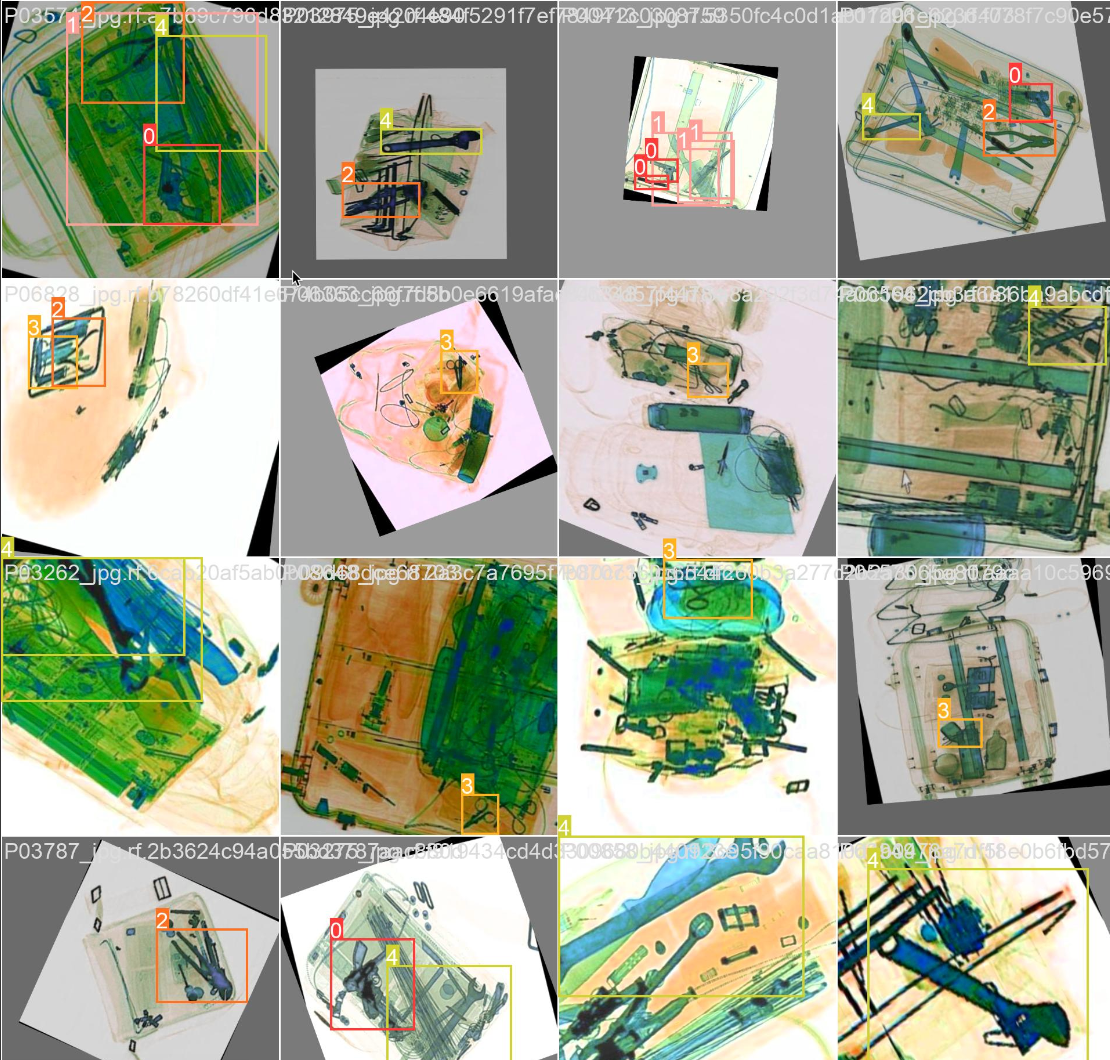

```
patience: 100
batch: 64
imgsz: 640
save: true
save_period: -1
val_period: 1
cache: false
device: null
workers: 8
project: null
name: train
exist_ok: false
pretrained: true
optimizer: auto
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 10
resume: false
amp: true
fraction: 1.0
profile: false
freeze: null
multi_scale: false
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
save_hybrid: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
vid_stride: 1
stream_buffer: false
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
embed: null
show: false
save_frames: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
show_boxes: true
line_width: null
format: torchscript
keras: false
optimize: false
int8: false
dynamic: false
simplify: false
opset: null
workspace: 4
nms: false
lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
box: 7.5
cls: 0.5
dfl: 1.5
pose: 12.0
kobj: 1.0
label_smoothing: 0.0
nbs: 64
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 30
translate: 0.1
scale: 0.5
shear: 0
perspective: 0
flipud: 0
fliplr: 0.5
bgr: 0.0
mosaic: 1
mixup: 0
copy_paste: 0.25
auto_augment: randaugment
erasing: 0.4
crop_fraction: 1.0
```

In [4]:
import yaml

# Define the paths to your datasets
train_path = '/content/X-Ray-Baggage-3/train'
val_path = '/content/X-Ray-Baggage-3/valid'
test_path = '/content/X-Ray-Baggage-3/test'  # Optional, if you have a test dataset

# Define the number of classes and their names
num_classes = 5
class_names = ['Gun', 'Knife', 'Pliers', 'Scissors', 'Wrench']

# Create a dictionary to hold the YAML data
data = {
    'train': train_path,
    'val': val_path,
    'test': test_path,  # Optional, remove if not needed
    'nc': num_classes,
    'names': class_names,

}

# Write the dictionary to a YAML file
with open('mydata.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("mydata.yaml file created successfully.")

mydata.yaml file created successfully.


In [5]:
!yolo task=detect mode=train epochs=30 batch=64 plots=True \
model='/content/weights/yolov10n.pt' \
data='/content/mydata.yaml' \
hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=30 translate=0.1 scale=0.5 shear=0 perspective=0 flipud=0 fliplr=0.5 mosaic=1 mixup=0 copy_paste=0.25

New https://pypi.org/project/ultralytics/8.2.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/mydata.yaml, epochs=30, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

#**Display the confusion matrix and Results**

In [6]:
from IPython.display import Image
from ultralytics import YOLOv10

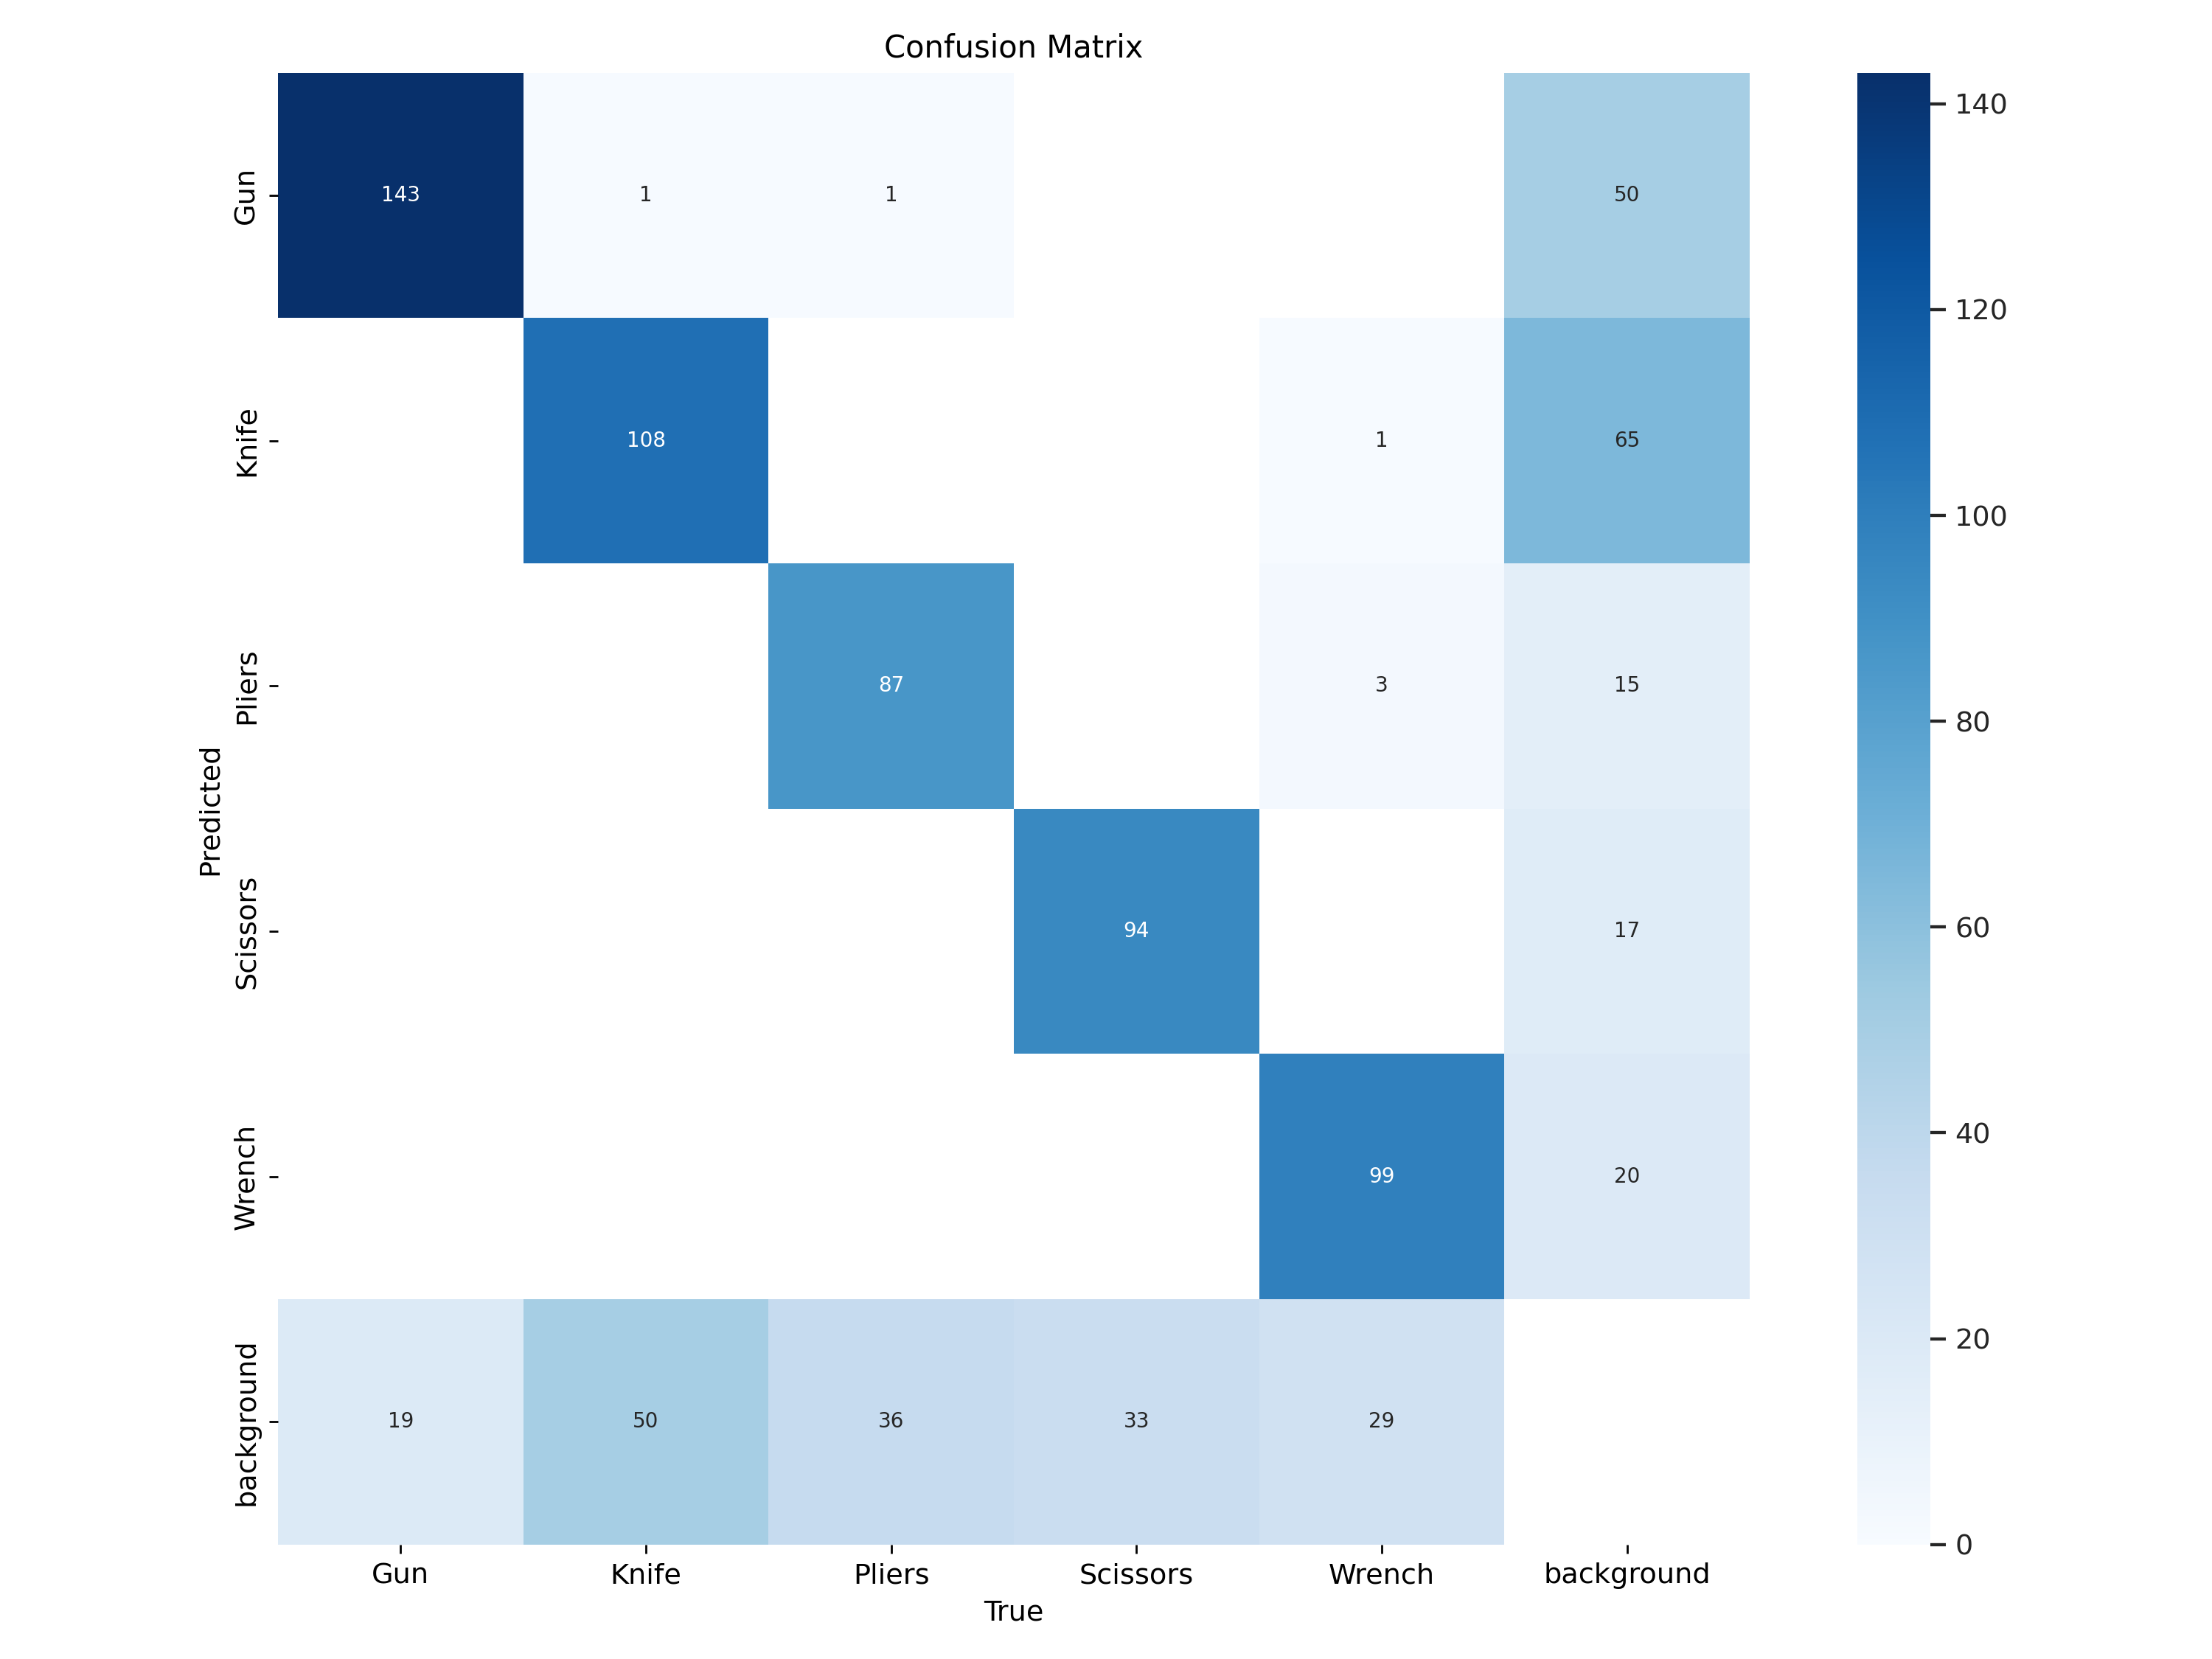

In [7]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

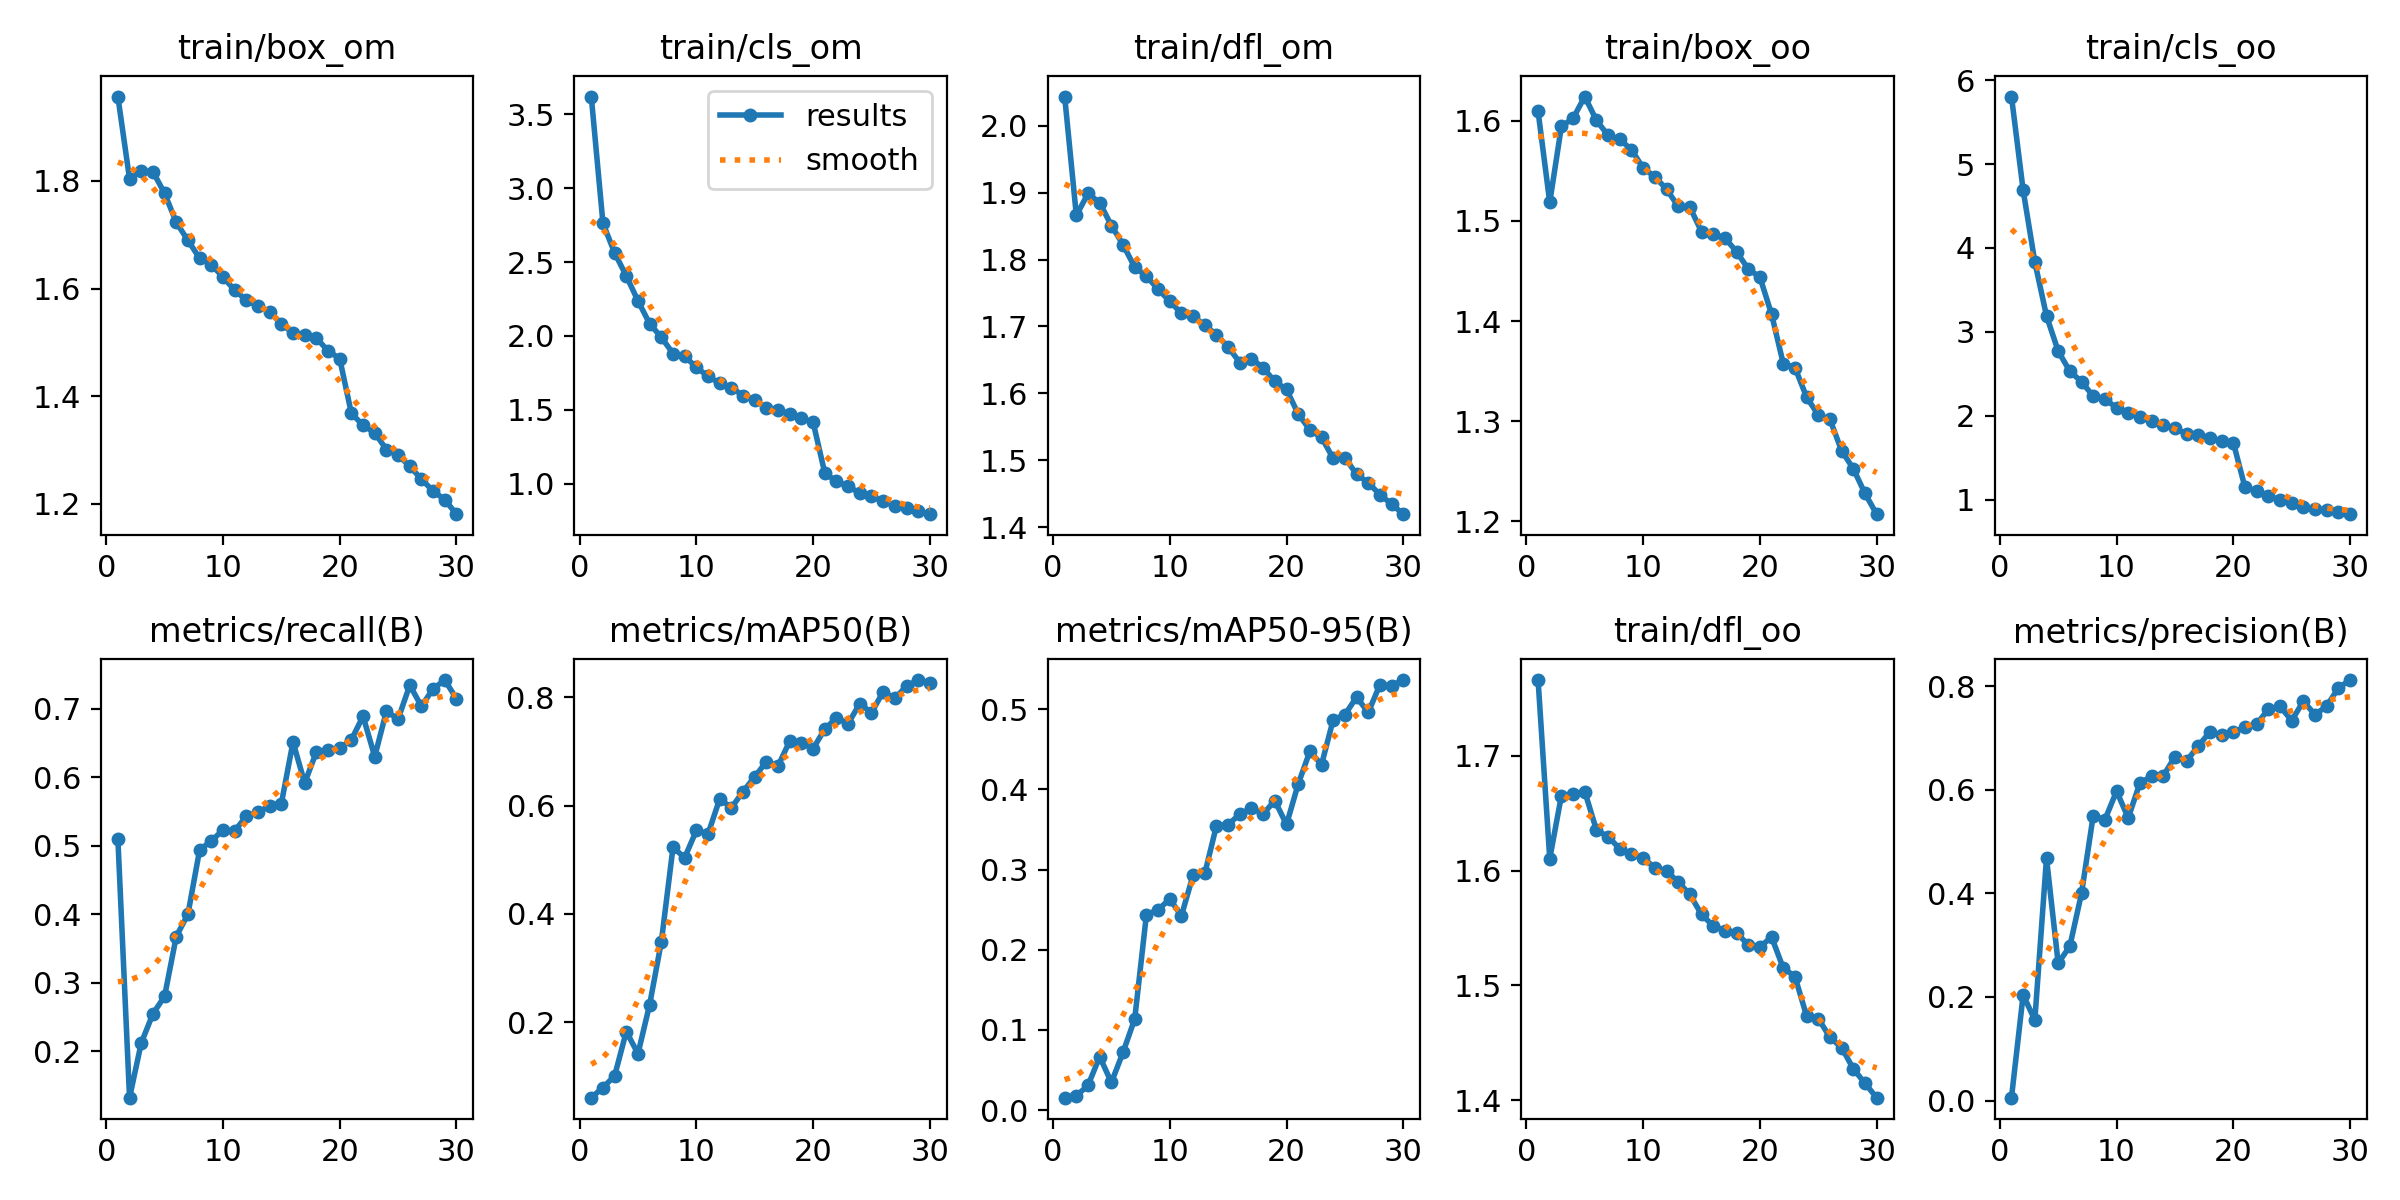

In [10]:
Image(filename='/content/runs/detect/train/results.png', width=600)

# **Testing the Trained Model**

In [12]:
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLOv10(model_path)
results = model(source='/content/X-Ray-Baggage-3/test/images', conf=0.25,save=True)



image 1/156 /content/X-Ray-Baggage-3/test/images/P00321_jpg.rf.a753c51cb1684a8d327fc73acffa53cf.jpg: 640x640 3 Knifes, 10.4ms
image 2/156 /content/X-Ray-Baggage-3/test/images/P00353_jpg.rf.ab98195444e07f1c6be37fff40286edb.jpg: 640x640 2 Guns, 2 Knifes, 11.3ms
image 3/156 /content/X-Ray-Baggage-3/test/images/P00357_jpg.rf.6f9e015e85ad8ccd9311618251703756.jpg: 640x640 3 Guns, 1 Knife, 10.3ms
image 4/156 /content/X-Ray-Baggage-3/test/images/P00371_jpg.rf.e41cb41e74ae4d8c9217554f655f4f5a.jpg: 640x640 1 Gun, 1 Knife, 10.1ms
image 5/156 /content/X-Ray-Baggage-3/test/images/P00393_jpg.rf.8ff515557778ae4cb961f609cc7d23b9.jpg: 640x640 3 Guns, 1 Knife, 10.5ms
image 6/156 /content/X-Ray-Baggage-3/test/images/P00515_jpg.rf.42fe02f7e40d2805c5cee4133f6994da.jpg: 640x640 2 Knifes, 10.1ms
image 7/156 /content/X-Ray-Baggage-3/test/images/P00634_jpg.rf.fa19e72bf567a66d1c6ea42f24322ac3.jpg: 640x640 1 Gun, 3 Wrenchs, 10.1ms
image 8/156 /content/X-Ray-Baggage-3/test/images/P00652_jpg.rf.2b2becb562df45b124

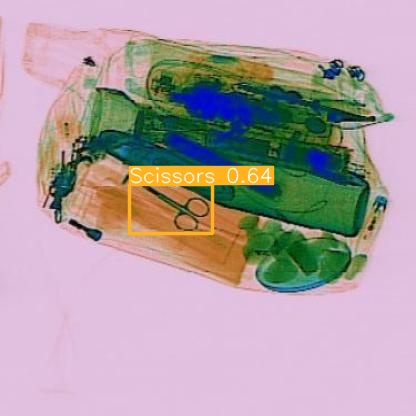

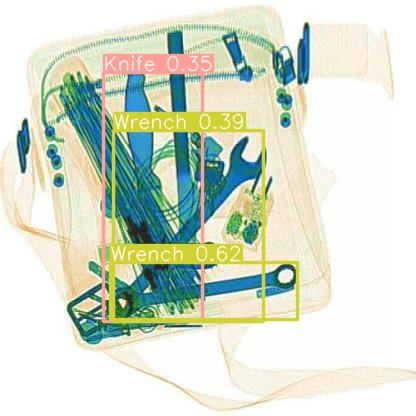

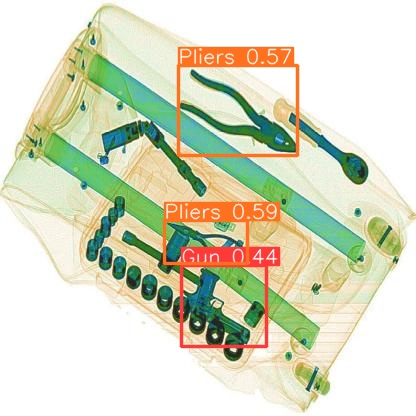

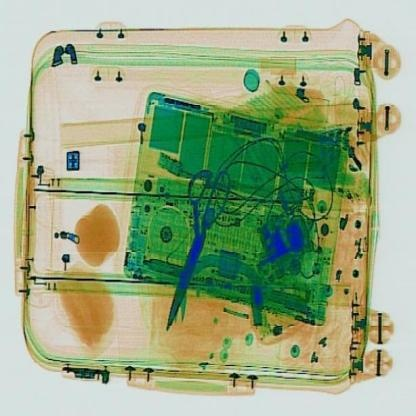

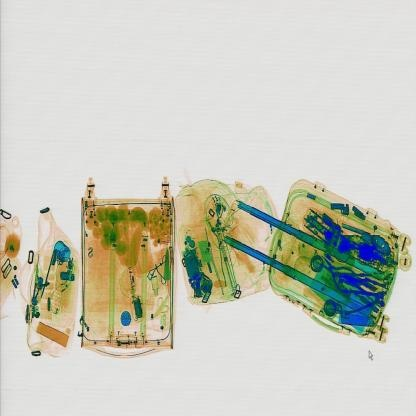

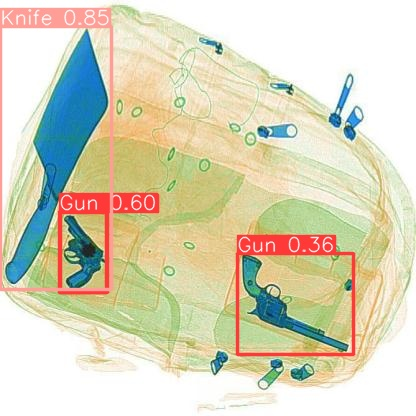

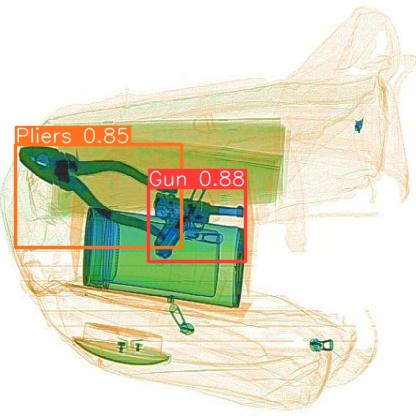

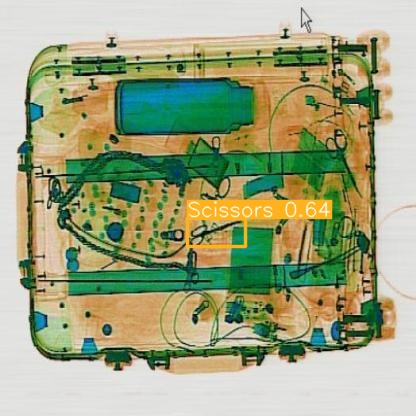

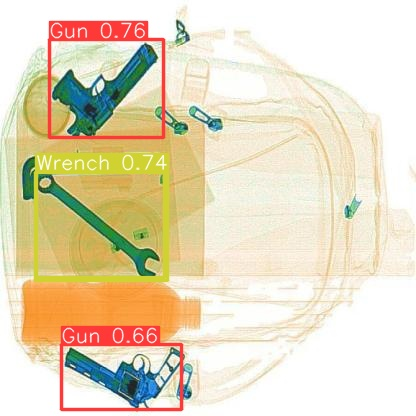

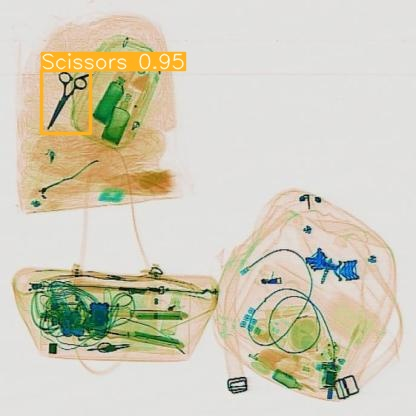

In [13]:
import glob
images = glob.glob('/content/runs/detect/predict/*.jpg')
for image in images[0:10]:
  display(Image(filename = image,width=400))

# **Testing on a video file**

In [ ]:
model_path = '/content/runs/detect/train3/weights/best.pt'
model = YOLOv10(model_path)
results = model(source='name of your video file here', conf=0.25,save=True)